# Share Price Analysis

## Polygon.io REST API

In [5]:
import os

from dotenv import load_dotenv
from matplotlib import pyplot as plt
from scipy.constants import degree

load_dotenv()

True

In [6]:
import os
import time
from polygon import RESTClient

polygon_api_key = os.getenv("POLYGON_API_KEY")

if not polygon_api_key:
    raise ValueError("A variável de ambiente POLYGON_API_KEY não foi definida.")

client = RESTClient(api_key=polygon_api_key)

### Get All Tickers

In [8]:
tickers = []
limit_per_request = 100
requests_per_minute = 5
delay = 60.0 / requests_per_minute
tickers_limit = 10

print("Iniciando a coleta de tickers...")

try:
    for i, t in enumerate(client.list_tickers(
        market="stocks",
        active=True,
        limit=limit_per_request,
        sort="ticker",
    )):
        tickers.append(t)
        if (i + 1) % limit_per_request == 0:
            print(f"Coletados {len(tickers)} tickers. Aguardando {delay:.1f} segundos para não exceder o limite...")
            time.sleep(delay)
        if i + 1 == tickers_limit:
            break

except Exception as e:
    print(f"Ocorreu um erro: {e}")

print(f"\nColeta finalizada. Total de tickers coletados: {len(tickers)}")
print(tickers)

Iniciando a coleta de tickers...

Coleta finalizada. Total de tickers coletados: 10
[Ticker(active=True, cik='0001090872', composite_figi='BBG000C2V3D6', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798087Z', locale='us', market='stocks', name='Agilent Technologies Inc.', primary_exchange='XNYS', share_class_figi='BBG001SCTQY4', ticker='A', type='CS', source_feed=None), Ticker(active=True, cik='0001675149', composite_figi='BBG00B3T3HD3', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798738Z', locale='us', market='stocks', name='Alcoa Corporation', primary_exchange='XNYS', share_class_figi='BBG00B3T3HF1', ticker='AA', type='CS', source_feed=None), Ticker(active=True, cik='0001776878', composite_figi='BBG01B0JRCS6', currency_name='usd', currency_symbol=None, base_currency_

In [4]:
for i, ticker in enumerate(tickers):
    print(f'===== Ticker {i + 1} =====')
    print(ticker)
    print()

===== Ticker 1 =====
Ticker(active=True, cik='0001090872', composite_figi='BBG000C2V3D6', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798087Z', locale='us', market='stocks', name='Agilent Technologies Inc.', primary_exchange='XNYS', share_class_figi='BBG001SCTQY4', ticker='A', type='CS', source_feed=None)

===== Ticker 2 =====
Ticker(active=True, cik='0001675149', composite_figi='BBG00B3T3HD3', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798738Z', locale='us', market='stocks', name='Alcoa Corporation', primary_exchange='XNYS', share_class_figi='BBG00B3T3HF1', ticker='AA', type='CS', source_feed=None)

===== Ticker 3 =====
Ticker(active=True, cik='0001776878', composite_figi='BBG01B0JRCS6', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_curr

### Ticker Overview

In [5]:
details = client.get_ticker_details(
	"AAPL",
)
details

TickerDetails(active=True, address=CompanyAddress(address1='ONE APPLE PARK WAY', address2=None, city='CUPERTINO', state='CA', country=None, postal_code='95014'), branding=Branding(icon_url='https://api.polygon.io/v1/reference/company-branding/YXBwbGUuY29t/images/2025-04-04_icon.png', logo_url='https://api.polygon.io/v1/reference/company-branding/YXBwbGUuY29t/images/2025-04-04_logo.svg', accent_color=None, light_color=None, dark_color=None), cik='0000320193', composite_figi='BBG000B9XRY4', currency_name='usd', currency_symbol=None, base_currency_name=None, base_currency_symbol=None, delisted_utc=None, description="Apple is among the largest companies in the world, with a broad portfolio of hardware and software products targeted at consumers and businesses. Apple's iPhone makes up a majority of the firm sales, and Apple's other products like Mac, iPad, and Watch are designed around the iPhone as the focal point of an expansive software ecosystem. Apple has progressively worked to add ne

### Daily Market Summary (OHLC)

In [5]:
grouped = client.get_grouped_daily_aggs(
    "2025-09-08",
    adjusted="true",
)
grouped

[GroupedDailyAgg(ticker='GERN', open=1.4, high=1.42, low=1.36, close=1.37, volume=5195147.0, vwap=1.3852, timestamp=1757361600000, transactions=13474, otc=None),
 GroupedDailyAgg(ticker='NRXS', open=2.43, high=2.4799, low=2.42, close=2.42, volume=13491, vwap=2.4282, timestamp=1757361600000, transactions=219, otc=None),
 GroupedDailyAgg(ticker='TLT', open=89.17, high=89.755, low=89.12, close=89.74, volume=54538678.0, vwap=89.4591, timestamp=1757361600000, transactions=162508, otc=None),
 GroupedDailyAgg(ticker='ASB', open=26.54, high=26.645, low=26.165, close=26.53, volume=1632852.0, vwap=26.4687, timestamp=1757361600000, transactions=19753, otc=None),
 GroupedDailyAgg(ticker='INDS', open=37.48, high=37.48, low=37.075, close=37.3529, volume=10368, vwap=37.2244, timestamp=1757361600000, transactions=201, otc=None),
 GroupedDailyAgg(ticker='PGJ', open=31.48, high=31.63, low=31.26, close=31.6099, volume=31639, vwap=31.4431, timestamp=1757361600000, transactions=275, otc=None),
 GroupedDail

In [6]:
len(grouped)

11408

In [7]:
tickers_list = [ticker.__dict__ for ticker in grouped]
tickers_list

[{'ticker': 'GERN',
  'open': 1.4,
  'high': 1.42,
  'low': 1.36,
  'close': 1.37,
  'volume': 5195147.0,
  'vwap': 1.3852,
  'timestamp': 1757361600000,
  'transactions': 13474,
  'otc': None},
 {'ticker': 'NRXS',
  'open': 2.43,
  'high': 2.4799,
  'low': 2.42,
  'close': 2.42,
  'volume': 13491,
  'vwap': 2.4282,
  'timestamp': 1757361600000,
  'transactions': 219,
  'otc': None},
 {'ticker': 'TLT',
  'open': 89.17,
  'high': 89.755,
  'low': 89.12,
  'close': 89.74,
  'volume': 54538678.0,
  'vwap': 89.4591,
  'timestamp': 1757361600000,
  'transactions': 162508,
  'otc': None},
 {'ticker': 'ASB',
  'open': 26.54,
  'high': 26.645,
  'low': 26.165,
  'close': 26.53,
  'volume': 1632852.0,
  'vwap': 26.4687,
  'timestamp': 1757361600000,
  'transactions': 19753,
  'otc': None},
 {'ticker': 'INDS',
  'open': 37.48,
  'high': 37.48,
  'low': 37.075,
  'close': 37.3529,
  'volume': 10368,
  'vwap': 37.2244,
  'timestamp': 1757361600000,
  'transactions': 201,
  'otc': None},
 {'ticker'

In [8]:
import pandas as pd

df_polygon = pd.DataFrame(tickers_list)
df_polygon

,ticker,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,GERN,1.4000,1.4200,1.3600,1.3700,5195147.0,1.3852,1757361600000,13474.0,None
1,NRXS,2.4300,2.4799,2.4200,2.4200,13491.0,2.4282,1757361600000,219.0,None
2,TLT,89.1700,89.7550,89.1200,89.7400,54538678.0,89.4591,1757361600000,162508.0,None
3,ASB,26.5400,26.6450,26.1650,26.5300,1632852.0,26.4687,1757361600000,19753.0,None
4,INDS,37.4800,37.4800,37.0750,37.3529,10368.0,37.2244,1757361600000,201.0,None
...,...,...,...,...,...,...,...,...,...,...
11403,ZXIET,100.0000,100.0000,100.0000,100.0000,2000.0,100.0000,1757361600000,1.0,None
11404,ZTEST,7616.1492,7616.1492,7616.1492,7616.1492,0.0,NaN,1757361600000,NaN,None
11405,ZIEXT,1.0000,1.0000,1.0000,1.0000,1000.0,1.0000,1757361600000,1.0,None
11406,ZVZZT,15.5500,15.5500,10.0000,12.1400,143487.0,11.7674,1757361600000,1293.0,None


In [9]:
df_polygon.isnull().sum()

ticker              0
open                0
high                0
low                 0
close               0
volume              0
vwap               59
timestamp           0
transactions       59
otc             11408
dtype: int64

In [11]:
df_polygon = df_polygon.fillna(0)
df_polygon.isnull().sum()

C:\Users\Victor Dantas\AppData\Local\Temp\ipykernel_23300\2348667912.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_polygon = df_polygon.fillna(0)


ticker          0
open            0
high            0
low             0
close           0
volume          0
vwap            0
timestamp       0
transactions    0
otc             0
dtype: int64

In [29]:
df_polygon.to_dict('records')

[{'ticker': 'GERN',
  'open': 1.4,
  'high': 1.42,
  'low': 1.36,
  'close': 1.37,
  'volume': 5195147.0,
  'vwap': 1.3852,
  'timestamp': 1757361600000,
  'transactions': 13474.0,
  'otc': 0},
 {'ticker': 'NRXS',
  'open': 2.43,
  'high': 2.4799,
  'low': 2.42,
  'close': 2.42,
  'volume': 13491.0,
  'vwap': 2.4282,
  'timestamp': 1757361600000,
  'transactions': 219.0,
  'otc': 0},
 {'ticker': 'TLT',
  'open': 89.17,
  'high': 89.755,
  'low': 89.12,
  'close': 89.74,
  'volume': 54538678.0,
  'vwap': 89.4591,
  'timestamp': 1757361600000,
  'transactions': 162508.0,
  'otc': 0},
 {'ticker': 'ASB',
  'open': 26.54,
  'high': 26.645,
  'low': 26.165,
  'close': 26.53,
  'volume': 1632852.0,
  'vwap': 26.4687,
  'timestamp': 1757361600000,
  'transactions': 19753.0,
  'otc': 0},
 {'ticker': 'INDS',
  'open': 37.48,
  'high': 37.48,
  'low': 37.075,
  'close': 37.3529,
  'volume': 10368.0,
  'vwap': 37.2244,
  'timestamp': 1757361600000,
  'transactions': 201.0,
  'otc': 0},
 {'ticker':

### Close Statistics at 2025-01-02

In [10]:
df_polygon["close"].mean()

np.float64(163.43072661177553)

In [11]:
df_polygon["close"].std()

np.float64(8704.503425518993)

### Getting monthly data

#### AAPL

In [12]:
aggs_aapl = []
for a in client.list_aggs(
    "AAPL",
    1,
    "day",
    "2025-01-01",
    "2025-01-31",
    adjusted="true",
    sort="asc",
    limit=120,
):
    aggs_aapl.append(a)

print(aggs_aapl)

[Agg(open=248.93, high=249.1, low=241.8201, close=243.85, volume=55740731.0, vwap=244.3303, timestamp=1735794000000, transactions=685448, otc=None), Agg(open=243.36, high=244.18, low=241.89, close=243.36, volume=40244114.0, vwap=243.0805, timestamp=1735880400000, transactions=493786, otc=None), Agg(open=244.31, high=247.33, low=243.2, close=245, volume=45045571.0, vwap=245.1726, timestamp=1736139600000, transactions=493920, otc=None), Agg(open=242.98, high=245.55, low=241.35, close=242.21, volume=40855960.0, vwap=242.9459, timestamp=1736226000000, transactions=462887, otc=None), Agg(open=241.92, high=243.7123, low=240.05, close=242.7, volume=37628940.0, vwap=242.2995, timestamp=1736312400000, transactions=406916, otc=None), Agg(open=240.01, high=240.16, low=233, close=236.85, volume=61710856.0, vwap=236.6061, timestamp=1736485200000, transactions=685976, otc=None), Agg(open=233.53, high=234.67, low=229.72, close=234.4, volume=49630725.0, vwap=232.7529, timestamp=1736744400000, transact

In [13]:
aggs_aapl_list = [agg.__dict__ for agg in aggs_aapl]
aggs_aapl_list

[{'open': 248.93,
  'high': 249.1,
  'low': 241.8201,
  'close': 243.85,
  'volume': 55740731.0,
  'vwap': 244.3303,
  'timestamp': 1735794000000,
  'transactions': 685448,
  'otc': None},
 {'open': 243.36,
  'high': 244.18,
  'low': 241.89,
  'close': 243.36,
  'volume': 40244114.0,
  'vwap': 243.0805,
  'timestamp': 1735880400000,
  'transactions': 493786,
  'otc': None},
 {'open': 244.31,
  'high': 247.33,
  'low': 243.2,
  'close': 245,
  'volume': 45045571.0,
  'vwap': 245.1726,
  'timestamp': 1736139600000,
  'transactions': 493920,
  'otc': None},
 {'open': 242.98,
  'high': 245.55,
  'low': 241.35,
  'close': 242.21,
  'volume': 40855960.0,
  'vwap': 242.9459,
  'timestamp': 1736226000000,
  'transactions': 462887,
  'otc': None},
 {'open': 241.92,
  'high': 243.7123,
  'low': 240.05,
  'close': 242.7,
  'volume': 37628940.0,
  'vwap': 242.2995,
  'timestamp': 1736312400000,
  'transactions': 406916,
  'otc': None},
 {'open': 240.01,
  'high': 240.16,
  'low': 233,
  'close': 2

In [14]:
df_appl = pd.DataFrame(aggs_aapl_list)
df_appl

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,248.930,249.1000,241.8201,243.85,55740731.0,244.3303,1735794000000,685448,None
1,243.360,244.1800,241.8900,243.36,40244114.0,243.0805,1735880400000,493786,None
2,244.310,247.3300,243.2000,245.00,45045571.0,245.1726,1736139600000,493920,None
3,242.980,245.5500,241.3500,242.21,40855960.0,242.9459,1736226000000,462887,None
4,241.920,243.7123,240.0500,242.70,37628940.0,242.2995,1736312400000,406916,None
5,240.010,240.1600,233.0000,236.85,61710856.0,236.6061,1736485200000,685976,None
6,233.530,234.6700,229.7200,234.40,49630725.0,232.7529,1736744400000,561231,None
7,234.750,236.1200,232.4720,233.28,39435294.0,233.8731,1736830800000,436333,None
8,234.635,238.9600,234.4300,237.87,39831969.0,237.5800,1736917200000,418804,None
9,237.350,238.0100,228.0300,228.26,71759052.0,230.4965,1737003600000,786112,None


Text(0, 0.5, 'Close')

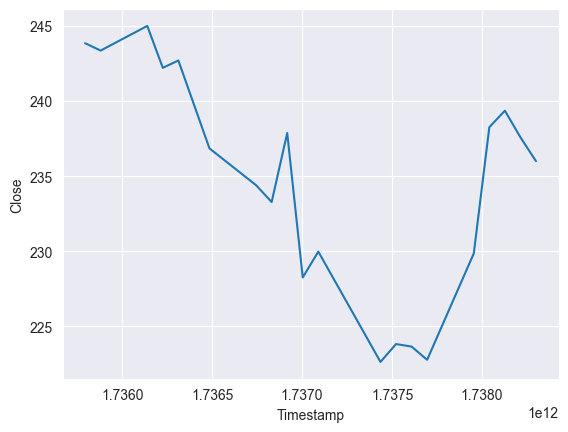

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_appl, x="timestamp", y="close")
plt.xlabel("Timestamp")
plt.ylabel("Close")

#### GOOGL

In [16]:
aggs_googl = []
for a in client.list_aggs(
    "GOOGL",
    1,
    "day",
    "2025-01-01",
    "2025-01-31",
    adjusted="true",
    sort="asc",
    limit=120,
):
    aggs_googl.append(a)

print(aggs_googl)

[Agg(open=190.65, high=192, low=187.5, close=189.43, volume=20370828.0, vwap=189.585, timestamp=1735794000000, transactions=328515, otc=None), Agg(open=191.37, high=193.21, low=189.975, close=191.79, volume=18596159.0, vwap=191.744, timestamp=1735880400000, transactions=261756, otc=None), Agg(open=193.98, high=198.2222, low=193.85, close=196.87, volume=29563638.0, vwap=196.6983, timestamp=1736139600000, transactions=385128, otc=None), Agg(open=197.11, high=201, low=194.6, close=195.49, volume=26487244.0, vwap=196.9118, timestamp=1736226000000, transactions=363663, otc=None), Agg(open=192.57, high=196.29, low=192.38, close=193.95, volume=24864766.0, vwap=194.3292, timestamp=1736312400000, transactions=339162, otc=None), Agg(open=194.295, high=196.52, low=190.31, close=192.04, volume=26665206.0, vwap=192.7975, timestamp=1736485200000, transactions=379247, otc=None), Agg(open=190.07, high=191.18, low=187.36, close=191.01, volume=21823699.0, vwap=190.091, timestamp=1736744400000, transacti

In [17]:
aggs_googl_list = [agg.__dict__ for agg in aggs_googl]
aggs_googl_list

[{'open': 190.65,
  'high': 192,
  'low': 187.5,
  'close': 189.43,
  'volume': 20370828.0,
  'vwap': 189.585,
  'timestamp': 1735794000000,
  'transactions': 328515,
  'otc': None},
 {'open': 191.37,
  'high': 193.21,
  'low': 189.975,
  'close': 191.79,
  'volume': 18596159.0,
  'vwap': 191.744,
  'timestamp': 1735880400000,
  'transactions': 261756,
  'otc': None},
 {'open': 193.98,
  'high': 198.2222,
  'low': 193.85,
  'close': 196.87,
  'volume': 29563638.0,
  'vwap': 196.6983,
  'timestamp': 1736139600000,
  'transactions': 385128,
  'otc': None},
 {'open': 197.11,
  'high': 201,
  'low': 194.6,
  'close': 195.49,
  'volume': 26487244.0,
  'vwap': 196.9118,
  'timestamp': 1736226000000,
  'transactions': 363663,
  'otc': None},
 {'open': 192.57,
  'high': 196.29,
  'low': 192.38,
  'close': 193.95,
  'volume': 24864766.0,
  'vwap': 194.3292,
  'timestamp': 1736312400000,
  'transactions': 339162,
  'otc': None},
 {'open': 194.295,
  'high': 196.52,
  'low': 190.31,
  'close': 19

In [18]:
df_googl = pd.DataFrame(aggs_googl_list)
df_googl

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,190.650,192.0000,187.5000,189.43,20370828.0,189.5850,1735794000000,328515,None
1,191.370,193.2100,189.9750,191.79,18596159.0,191.7440,1735880400000,261756,None
2,193.980,198.2222,193.8500,196.87,29563638.0,196.6983,1736139600000,385128,None
3,197.110,201.0000,194.6000,195.49,26487244.0,196.9118,1736226000000,363663,None
4,192.570,196.2900,192.3800,193.95,24864766.0,194.3292,1736312400000,339162,None
5,194.295,196.5200,190.3100,192.04,26665206.0,192.7975,1736485200000,379247,None
6,190.070,191.1800,187.3600,191.01,21823699.0,190.0910,1736744400000,299678,None
7,191.240,191.9800,188.3082,189.66,17174854.0,190.0464,1736830800000,236897,None
8,193.090,196.3600,191.8600,195.55,21775969.0,194.8156,1736917200000,270843,None
9,194.140,195.4800,192.8100,192.91,17815432.0,193.8050,1737003600000,243139,None


Text(0, 0.5, 'Close')

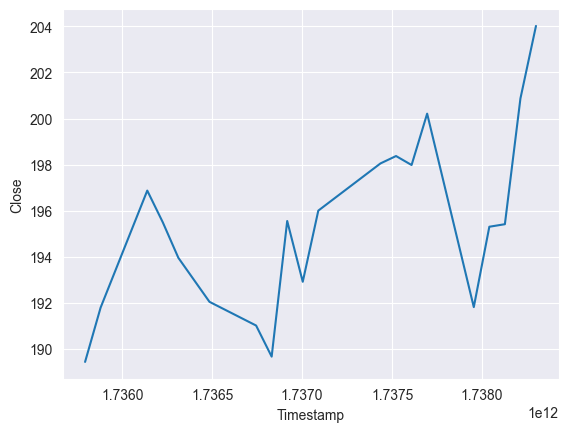

In [19]:
sns.lineplot(data=df_googl, x="timestamp", y="close")

plt.xlabel("Timestamp")
plt.ylabel("Close")

### Getting All Tickers

In [7]:
grouped = client.get_grouped_daily_aggs(
    "2025-09-08",
    adjusted="true",
)
grouped

[GroupedDailyAgg(ticker='ENOV', open=32.01, high=32.04, low=31.1, close=31.4, volume=726955, vwap=31.3649, timestamp=1757361600000, transactions=13652, otc=None),
 GroupedDailyAgg(ticker='PGJ', open=31.48, high=31.63, low=31.26, close=31.6099, volume=31639, vwap=31.4431, timestamp=1757361600000, transactions=275, otc=None),
 GroupedDailyAgg(ticker='PRTS', open=1.12, high=1.17, low=0.9604, close=1.06, volume=1549524.0, vwap=1.0915, timestamp=1757361600000, transactions=4583, otc=None),
 GroupedDailyAgg(ticker='DHAI', open=0.229, high=0.2374, low=0.2202, close=0.2229, volume=5759674.0, vwap=0.2286, timestamp=1757361600000, transactions=3100, otc=None),
 GroupedDailyAgg(ticker='ASB', open=26.54, high=26.645, low=26.165, close=26.53, volume=1632852.0, vwap=26.4687, timestamp=1757361600000, transactions=19753, otc=None),
 GroupedDailyAgg(ticker='INDS', open=37.48, high=37.48, low=37.075, close=37.3529, volume=10368, vwap=37.2244, timestamp=1757361600000, transactions=201, otc=None),
 Groupe

In [8]:
len(grouped)

11408

In [9]:
tickers_list = [ticker.__dict__['ticker'] for ticker in grouped]
tickers_list

['ENOV',
 'PGJ',
 'PRTS',
 'DHAI',
 'ASB',
 'INDS',
 'NRXS',
 'GERN',
 'TLT',
 'EQX',
 'AMZU',
 'SION',
 'MIRM',
 'NNOX',
 'BMAX',
 'FNGG',
 'PRDO',
 'EFSC',
 'GYRO',
 'VT',
 'CMRC',
 'VRRM',
 'CRF',
 'BOF',
 'AERT',
 'KTOS',
 'LC',
 'CCD',
 'NVX',
 'PMIO',
 'XCCC',
 'AQN',
 'VCRM',
 'SLJY',
 'VLO',
 'SOYB',
 'IYK',
 'PTNQ',
 'FOSLL',
 'CALF',
 'QQEW',
 'ISPC',
 'APLD',
 'ETSY',
 'WTGUR',
 'CLOZ',
 'QNTM',
 'TOI',
 'SFLR',
 'HYDW',
 'EDBL',
 'BWFG',
 'XNTK',
 'PMTS',
 'DIVB',
 'NMFCZ',
 'LEAD',
 'DWX',
 'BITC',
 'NIXX',
 'DSGX',
 'INEQ',
 'PID',
 'FXE',
 'ETHV',
 'CHTR',
 'UHG',
 'RPHS',
 'NSPR',
 'TSLG',
 'TDAQ',
 'FSIG',
 'NVD',
 'ARKG',
 'AGIX',
 'RZLV',
 'SUSA',
 'SENS',
 'CXAI',
 'INTC',
 'XENE',
 'ACCO',
 'GSIW',
 'ABT',
 'AAOI',
 'WAI',
 'FFGX',
 'CTA',
 'PLTD',
 'QNST',
 'PEY',
 'BKF',
 'FIW',
 'MYPS',
 'ELVA',
 'DOG',
 'MPB',
 'CAPR',
 'HEQT',
 'LEGN',
 'SITC',
 'DWM',
 'AVEM',
 'CUT',
 'BIIB',
 'TYO',
 'CGTX',
 'RCEL',
 'FITBI',
 'RFIL',
 'VTES',
 'GMET',
 'FRGT',
 'VEGN',
 '

### Getting Anual Data

In [34]:
aggs_googl = []
for a in client.list_aggs(
    "GOOGL",
    1,
    "day",
    "2024-01-01",
    "2024-12-31",
    adjusted="true",
    sort="asc",
    limit=120,
):
    aggs_googl.append(a)

print(aggs_googl)

[Agg(open=138.55, high=139.45, low=136.48, close=138.17, volume=23711220.0, vwap=137.7743, timestamp=1704171600000, transactions=313941, otc=None), Agg(open=137.25, high=139.63, low=137.08, close=138.92, volume=24212147.0, vwap=138.7415, timestamp=1704258000000, transactions=271651, otc=None), Agg(open=138.42, high=139.16, low=136.35, close=136.39, volume=27137735.0, vwap=137.2931, timestamp=1704344400000, transactions=278803, otc=None), Agg(open=136.745, high=137.1558, low=135.15, close=135.73, volume=22513854.0, vwap=135.9907, timestamp=1704430800000, transactions=254931, otc=None), Agg(open=136.29, high=139.01, low=136.26, close=138.84, volume=21403982.0, vwap=138.0736, timestamp=1704690000000, transactions=251454, otc=None), Agg(open=138.5, high=141.485, low=138.15, close=140.95, volume=24759598.0, vwap=140.4414, timestamp=1704776400000, transactions=309524, otc=None), Agg(open=141, high=143, low=140.91, close=142.28, volume=21320203.0, vwap=142.0843, timestamp=1704862800000, trans

In [35]:
len(aggs_googl)

252

In [39]:
aggs_googl_list = [agg.__dict__ for agg in aggs_googl]
aggs_googl_list

[{'open': 138.55,
  'high': 139.45,
  'low': 136.48,
  'close': 138.17,
  'volume': 23711220.0,
  'vwap': 137.7743,
  'timestamp': 1704171600000,
  'transactions': 313941,
  'otc': None},
 {'open': 137.25,
  'high': 139.63,
  'low': 137.08,
  'close': 138.92,
  'volume': 24212147.0,
  'vwap': 138.7415,
  'timestamp': 1704258000000,
  'transactions': 271651,
  'otc': None},
 {'open': 138.42,
  'high': 139.16,
  'low': 136.35,
  'close': 136.39,
  'volume': 27137735.0,
  'vwap': 137.2931,
  'timestamp': 1704344400000,
  'transactions': 278803,
  'otc': None},
 {'open': 136.745,
  'high': 137.1558,
  'low': 135.15,
  'close': 135.73,
  'volume': 22513854.0,
  'vwap': 135.9907,
  'timestamp': 1704430800000,
  'transactions': 254931,
  'otc': None},
 {'open': 136.29,
  'high': 139.01,
  'low': 136.26,
  'close': 138.84,
  'volume': 21403982.0,
  'vwap': 138.0736,
  'timestamp': 1704690000000,
  'transactions': 251454,
  'otc': None},
 {'open': 138.5,
  'high': 141.485,
  'low': 138.15,
  'c

In [40]:
df_googl = pd.DataFrame(aggs_googl_list)
df_googl

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,138.550,139.4500,136.480,138.17,23711220.0,137.7743,1704171600000,313941,None
1,137.250,139.6300,137.080,138.92,24212147.0,138.7415,1704258000000,271651,None
2,138.420,139.1600,136.350,136.39,27137735.0,137.2931,1704344400000,278803,None
3,136.745,137.1558,135.150,135.73,22513854.0,135.9907,1704430800000,254931,None
4,136.290,139.0100,136.260,138.84,21403982.0,138.0736,1704690000000,251454,None
...,...,...,...,...,...,...,...,...,...
247,194.840,196.1100,193.780,196.11,10403259.0,195.5292,1735016400000,155818,None
248,195.150,196.7480,194.375,195.60,12057210.0,195.8087,1735189200000,196317,None
249,194.950,195.3200,190.650,192.76,18891362.0,192.4079,1735275600000,284116,None
250,189.800,192.5500,189.120,191.24,14264659.0,191.1967,1735534800000,255690,None


Text(0, 0.5, 'Close')

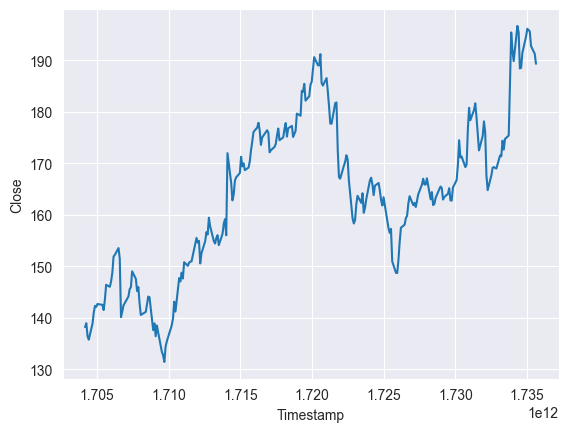

In [41]:
sns.lineplot(data=df_googl, x="timestamp", y="close")

plt.xlabel("Timestamp")
plt.ylabel("Close")

### Get Stock Data by Interval Function

#### Error

In [59]:
from typing import List

def get_stock_data(polygon_client, list_stocks: List[str], start_date: str, end_date: str) -> List:
    all_stocks = []
    limit_request_per_minute = 5
    for i, stock in enumerate(list_stocks):
        list_stocks_data = []
        for stock_data in polygon_client.list_aggs(
            stock,
            1,
            "day",
            start_date,
            end_date,
            adjusted="true",
            sort="asc",
            limit=120,
        ):
            list_stocks_data.append(stock_data)
        all_stocks.append(list_stocks_data)
        print(f'Stock {stock} collected.')
        print('Sleeping...')
        time.sleep(12)
    return all_stocks

#### Work

In [16]:
from typing import List
import pandas as pd
from polygon.rest import RESTClient

def get_stock_data_robust(
    polygon_client: RESTClient,
    list_stocks: List[str],
    start_date: str,
    end_date: str
) -> List:
    """
    Return stocks data by interval
    Args:
        polygon_client: Polygon client to access data
        list_stocks: list of stocks to get data for
        start_date: start date to get data for
        end_date: end date to get data for

    Returns: A list of stocks data

    """
    all_stocks_data = {}

    for stock_ticker in list_stocks:
        retries = 3
        while retries > 0:
            try:
                print(f"Coletando dados para o ticker: {stock_ticker}...")
                aggs = polygon_client.list_aggs(
                    ticker=stock_ticker,
                    multiplier=1,
                    timespan="day",
                    from_=start_date,
                    to=end_date,
                    adjusted=True,
                    sort="asc",
                    limit=50000
                )

                all_stocks_data[stock_ticker] = list(aggs)

                pd.DataFrame([agg.__dict__ for agg in all_stocks_data[stock_ticker]]) \
                    .to_parquet(f'data/{stock_ticker}_2023_09_01_to_2025_09_08.parquet')

                print(f"✅ Dados para {stock_ticker} coletados com sucesso.")

                time.sleep(12.5)

                break

            except Exception as e:
                print(f"❌ Ocorreu um erro com {stock_ticker}: {e}")
                retries = 0
                break
    return all_stocks_data

In [ ]:
all_stocks = get_stock_data_robust(client, tickers_list, '2023-09-01', '2025-09-08')

Coletando dados para o ticker: OGI...
✅ Dados para OGI coletados com sucesso.
Coletando dados para o ticker: IYZ...
✅ Dados para IYZ coletados com sucesso.
Coletando dados para o ticker: QURE...
✅ Dados para QURE coletados com sucesso.
Coletando dados para o ticker: JHEM...
✅ Dados para JHEM coletados com sucesso.
Coletando dados para o ticker: BMEA...
✅ Dados para BMEA coletados com sucesso.
Coletando dados para o ticker: EGBN...
✅ Dados para EGBN coletados com sucesso.
Coletando dados para o ticker: MSSM...
✅ Dados para MSSM coletados com sucesso.
Coletando dados para o ticker: SDY...
✅ Dados para SDY coletados com sucesso.
Coletando dados para o ticker: ADAG...
✅ Dados para ADAG coletados com sucesso.
Coletando dados para o ticker: XLB...
✅ Dados para XLB coletados com sucesso.
Coletando dados para o ticker: QVCGA...
✅ Dados para QVCGA coletados com sucesso.
Coletando dados para o ticker: ARCT...
✅ Dados para ARCT coletados com sucesso.
Coletando dados para o ticker: AAME...
✅ Dados

The last stock collected was CCSO

### Removing Stocks Already Collected

In [10]:
import os

list_data_files = os.listdir('data')
len(list_data_files)

909

In [11]:
list_data_files

['AACT_2023_09_01_to_2025_09_08.parquet',
 'AAME_2023_09_01_to_2025_09_08.parquet',
 'AAOI_2023_09_01_to_2025_09_08.parquet',
 'AAPL_2023_09_01_to_2025_09_08.parquet',
 'ABAT_2023_09_01_to_2025_09_08.parquet',
 'ABP_2023_09_01_to_2025_09_08.parquet',
 'ABTC_2023_09_01_to_2025_09_08.parquet',
 'ABT_2023_09_01_to_2025_09_08.parquet',
 'ACCO_2023_09_01_to_2025_09_08.parquet',
 'ACIW_2023_09_01_to_2025_09_08.parquet',
 'ACVF_2023_09_01_to_2025_09_08.parquet',
 'ADAG_2023_09_01_to_2025_09_08.parquet',
 'ADBE_2023_09_01_to_2025_09_08.parquet',
 'ADBG_2023_09_01_to_2025_09_08.parquet',
 'ADC_2023_09_01_to_2025_09_08.parquet',
 'ADNWW_2023_09_01_to_2025_09_08.parquet',
 'ADPT_2023_09_01_to_2025_09_08.parquet',
 'ADVB_2023_09_01_to_2025_09_08.parquet',
 'ADVM_2023_09_01_to_2025_09_08.parquet',
 'AEBI_2023_09_01_to_2025_09_08.parquet',
 'AEI_2023_09_01_to_2025_09_08.parquet',
 'AEMD_2023_09_01_to_2025_09_08.parquet',
 'AERT_2023_09_01_to_2025_09_08.parquet',
 'AGIX_2023_09_01_to_2025_09_08.parqu

In [12]:
stocks_read = [file.split('_')[0] for file in list_data_files]
stocks_read

['AACT',
 'AAME',
 'AAOI',
 'AAPL',
 'ABAT',
 'ABP',
 'ABTC',
 'ABT',
 'ACCO',
 'ACIW',
 'ACVF',
 'ADAG',
 'ADBE',
 'ADBG',
 'ADC',
 'ADNWW',
 'ADPT',
 'ADVB',
 'ADVM',
 'AEBI',
 'AEI',
 'AEMD',
 'AERT',
 'AGIX',
 'AGMH',
 'AGNCM',
 'AGZD',
 'AIBU',
 'AIEQ',
 'AIFF',
 'AIHS',
 'AIM',
 'AIRJ',
 'AKR',
 'ALT',
 'AMAT',
 'AMBO',
 'AMCR',
 'AMPH',
 'AMUU',
 'AMZN',
 'AMZU',
 'ANTA',
 'AOA',
 'AOTG',
 'API',
 'APLD',
 'APLT',
 'APP',
 'APT',
 'AQN',
 'ARCC',
 'ARCT',
 'ARGT',
 'ARKB',
 'ARKG',
 'ARKW',
 'ARMP',
 'ARQ',
 'ASBP',
 'ASB',
 'ATOM',
 'ATOS',
 'AUST',
 'AVBP',
 'AVEM',
 'AVES',
 'AVIV',
 'AVL',
 'AVMU',
 'AVO',
 'AVTX',
 'AVUS',
 'AVXL',
 'AWX',
 'AXSM',
 'BASE',
 'BATT',
 'BBBY',
 'BBCA',
 'BBCP',
 'BBHY',
 'BBSC',
 'BCE',
 'BDSX',
 'BEAM',
 'BETR',
 'BGLC',
 'BGL',
 'BHFAL',
 'BIGY',
 'BIIB',
 'BINC',
 'BITC',
 'BITF',
 'BKAG',
 'BKCH',
 'BKD',
 'BKF',
 'BLFY',
 'BLOK',
 'BMAX',
 'BMA',
 'BMEA',
 'BMR',
 'BNAI',
 'BNDX',
 'BOF',
 'BOLT',
 'BOTT',
 'BOUT',
 'BRN',
 'BRTR',
 'BSG

In [13]:
print(len(tickers_list))
tickers_list = [ticker for ticker in tickers_list if ticker not in stocks_read]
len(tickers_list)

11408


10499

In [2]:
import pandas as pd

pd.read_parquet('data/GERN_2023_09_01_to_2025_09_08.parquet')

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,2.45,2.480,2.28,2.34,4689079.0,2.3443,1694404800000,16802,None
1,2.59,2.655,2.25,2.30,18501815.0,2.3908,1694491200000,39853,None
2,2.34,2.410,2.24,2.25,11215493.0,2.2925,1694577600000,22282,None
3,2.25,2.335,2.22,2.30,4772130.0,2.2998,1694664000000,19376,None
4,2.30,2.315,2.18,2.21,19075001.0,2.2148,1694750400000,22984,None
...,...,...,...,...,...,...,...,...,...
494,1.40,1.520,1.39,1.47,11797380.0,1.4738,1756785600000,15958,None
495,1.46,1.480,1.38,1.40,9189257.0,1.4116,1756872000000,12444,None
496,1.40,1.420,1.36,1.38,5229328.0,1.3804,1756958400000,9539,None
497,1.38,1.420,1.36,1.40,5109051.0,1.3941,1757044800000,11843,None


## Transforming Stock Data in Dataframe

In [9]:
all_stocks.keys()

dict_keys(['ENOV', 'PGJ', 'PRTS', 'DHAI', 'ASB', 'INDS', 'NRXS', 'GERN', 'TLT', 'EQX', 'AMZU', 'SION', 'MIRM', 'NNOX', 'BMAX', 'FNGG', 'PRDO', 'EFSC', 'GYRO', 'VT', 'CMRC', 'VRRM', 'CRF', 'BOF', 'AERT', 'KTOS', 'LC', 'CCD', 'NVX', 'PMIO', 'XCCC', 'AQN', 'VCRM', 'SLJY', 'VLO', 'SOYB', 'IYK', 'PTNQ', 'FOSLL', 'CALF', 'QQEW', 'ISPC', 'APLD', 'ETSY', 'WTGUR', 'CLOZ', 'QNTM', 'TOI', 'SFLR', 'HYDW'])

In [10]:
all_stocks['GERN']

[Agg(open=2.1, high=2.23, low=2.08, close=2.14, volume=4810251.0, vwap=2.1606, timestamp=1704171600000, transactions=12245, otc=None),
 Agg(open=2.14, high=2.14, low=1.985, close=2.01, volume=6953593.0, vwap=2.022, timestamp=1704258000000, transactions=14533, otc=None),
 Agg(open=2.03, high=2.14, low=2.01, close=2.09, volume=5201333.0, vwap=2.0883, timestamp=1704344400000, transactions=9071, otc=None),
 Agg(open=2.1, high=2.1, low=1.97, close=2.01, volume=4823988.0, vwap=2.0034, timestamp=1704430800000, transactions=14788, otc=None),
 Agg(open=2, high=2.16, low=1.97, close=2.15, volume=5469130.0, vwap=2.0966, timestamp=1704690000000, transactions=11757, otc=None),
 Agg(open=2.11, high=2.16, low=2.045, close=2.11, volume=5317115.0, vwap=2.1056, timestamp=1704776400000, transactions=11883, otc=None),
 Agg(open=2.1, high=2.19, low=2.04, close=2.08, volume=3052483.0, vwap=2.0799, timestamp=1704862800000, transactions=8645, otc=None),
 Agg(open=2.06, high=2.06, low=1.98, close=2.01, volume=

In [11]:
type(all_stocks['GERN'][0])

polygon.rest.models.aggs.Agg

In [12]:
for stock in all_stocks.keys():
    print(f'Transforming {stock} to dict...')
    all_stocks[stock] = [agg.__dict__ for agg in all_stocks[stock]]

Transforming ENOV to dict...
Transforming PGJ to dict...
Transforming PRTS to dict...
Transforming DHAI to dict...
Transforming ASB to dict...
Transforming INDS to dict...
Transforming NRXS to dict...
Transforming GERN to dict...
Transforming TLT to dict...
Transforming EQX to dict...
Transforming AMZU to dict...
Transforming SION to dict...
Transforming MIRM to dict...
Transforming NNOX to dict...
Transforming BMAX to dict...
Transforming FNGG to dict...
Transforming PRDO to dict...
Transforming EFSC to dict...
Transforming GYRO to dict...
Transforming VT to dict...
Transforming CMRC to dict...
Transforming VRRM to dict...
Transforming CRF to dict...
Transforming BOF to dict...
Transforming AERT to dict...
Transforming KTOS to dict...
Transforming LC to dict...
Transforming CCD to dict...
Transforming NVX to dict...
Transforming PMIO to dict...
Transforming XCCC to dict...
Transforming AQN to dict...
Transforming VCRM to dict...
Transforming SLJY to dict...
Transforming VLO to dict...

In [14]:
import pandas as pd

for stock in all_stocks.keys():
    print(f'Transforming {stock} to dataframe...')
    all_stocks[stock] = pd.DataFrame(all_stocks[stock])

Transforming ENOV to dataframe...
Transforming PGJ to dataframe...
Transforming PRTS to dataframe...
Transforming DHAI to dataframe...
Transforming ASB to dataframe...
Transforming INDS to dataframe...
Transforming NRXS to dataframe...
Transforming GERN to dataframe...
Transforming TLT to dataframe...
Transforming EQX to dataframe...
Transforming AMZU to dataframe...
Transforming SION to dataframe...
Transforming MIRM to dataframe...
Transforming NNOX to dataframe...
Transforming BMAX to dataframe...
Transforming FNGG to dataframe...
Transforming PRDO to dataframe...
Transforming EFSC to dataframe...
Transforming GYRO to dataframe...
Transforming VT to dataframe...
Transforming CMRC to dataframe...
Transforming VRRM to dataframe...
Transforming CRF to dataframe...
Transforming BOF to dataframe...
Transforming AERT to dataframe...
Transforming KTOS to dataframe...
Transforming LC to dataframe...
Transforming CCD to dataframe...
Transforming NVX to dataframe...
Transforming PMIO to dataf

In [15]:
import os

os.makedirs('data', exist_ok=True)

start_date, end_date = '2024-01-01', '2024-12-31'
for stock in all_stocks.keys():
    print(f'Saving {stock} to parquet...')
    all_stocks[stock].to_parquet(f'data/{stock}_{start_date}_to_{end_date}.parquet')

Saving ENOV to parquet...
Saving PGJ to parquet...
Saving PRTS to parquet...
Saving DHAI to parquet...
Saving ASB to parquet...
Saving INDS to parquet...
Saving NRXS to parquet...
Saving GERN to parquet...
Saving TLT to parquet...
Saving EQX to parquet...
Saving AMZU to parquet...
Saving SION to parquet...
Saving MIRM to parquet...
Saving NNOX to parquet...
Saving BMAX to parquet...
Saving FNGG to parquet...
Saving PRDO to parquet...
Saving EFSC to parquet...
Saving GYRO to parquet...
Saving VT to parquet...
Saving CMRC to parquet...
Saving VRRM to parquet...
Saving CRF to parquet...
Saving BOF to parquet...
Saving AERT to parquet...
Saving KTOS to parquet...
Saving LC to parquet...
Saving CCD to parquet...
Saving NVX to parquet...
Saving PMIO to parquet...
Saving XCCC to parquet...
Saving AQN to parquet...
Saving VCRM to parquet...
Saving SLJY to parquet...
Saving VLO to parquet...
Saving SOYB to parquet...
Saving IYK to parquet...
Saving PTNQ to parquet...
Saving FOSLL to parquet...


## Analyse GERN Stock

### GERN Stock Description
GERN (Geron Corporation) is a commercial-stage biopharmaceutical company focused on developing treatments for blood cancers, specifically Myelodysplastic Syndromes (MDS) and Myelofibrosis. The company's primary product, RYTELO (imetelstat), is a telomerase inhibitor approved for certain adult patients with lower-risk MDS. Geron is exploring further applications for imetelstat in other blood-related cancers, with revenue generated from RYTELO sales and collaboration agreements.

In [16]:
df_gern = all_stocks['GERN']
df_gern

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,2.10,2.230,2.080,2.14,4810251.0,2.1606,1704171600000,12245,None
1,2.14,2.140,1.985,2.01,6953593.0,2.0220,1704258000000,14533,None
2,2.03,2.140,2.010,2.09,5201333.0,2.0883,1704344400000,9071,None
3,2.10,2.100,1.970,2.01,4823988.0,2.0034,1704430800000,14788,None
4,2.00,2.160,1.970,2.15,5469130.0,2.0966,1704690000000,11757,None
...,...,...,...,...,...,...,...,...,...
246,3.34,3.350,3.280,3.34,5595677.0,3.3172,1735016400000,16060,None
247,3.30,3.335,3.260,3.30,20871209.0,3.2976,1735189200000,28101,None
248,3.29,3.400,3.200,3.35,34022870.0,3.2514,1735275600000,43694,None
249,3.34,3.425,3.230,3.40,23769669.0,3.3873,1735534800000,27829,None


### Describe Statistics of GERN Stock Close Value on 2024

In [19]:
print(f"Stock Close Value Mean on 2024: {df_gern['close'].mean():.2f}")

Stock Close Value Mean on 2024: 3.69


In [20]:
print(f"Stock Close Value STD on 2024: {df_gern['close'].std():.2f}")

Stock Close Value STD on 2024: 0.93


In [23]:
print(f"Stock Close Value Max on 2024: {df_gern['close'].max():.2f}")

Stock Close Value Max on 2024: 5.09


In [24]:
print(f"Stock Close Value Min on 2024: {df_gern['close'].min():.2f}")

Stock Close Value Min on 2024: 1.75


In [25]:
print(f"Stock Close Value Median on 2024: {df_gern['close'].median():.2f}")

Stock Close Value Median on 2024: 3.97


In [28]:
min_timestamp_idx = df_gern['timestamp'].idxmin()
max_timestamp_idx = df_gern['timestamp'].idxmax()

In [31]:
start_close_value = df_gern.iloc[min_timestamp_idx]['close']
print(f'Close value on start of 2024: {start_close_value:.2f}')

Start value on start of 2024: 2.14


In [32]:
end_close_value = df_gern.iloc[max_timestamp_idx]['close']
print(f'Close value on end of 2024: {end_close_value:.2f}')

Close value on end of 2024: 3.54


### GERN Stock Plots

<Axes: xlabel='close'>

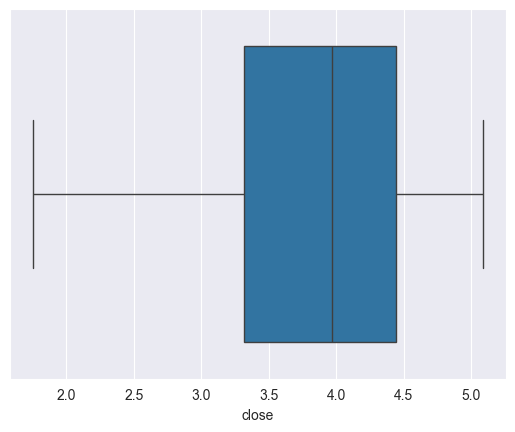

In [26]:
import seaborn as sns

sns.boxplot(data=df_gern, x="close")

<Axes: xlabel='close', ylabel='Count'>

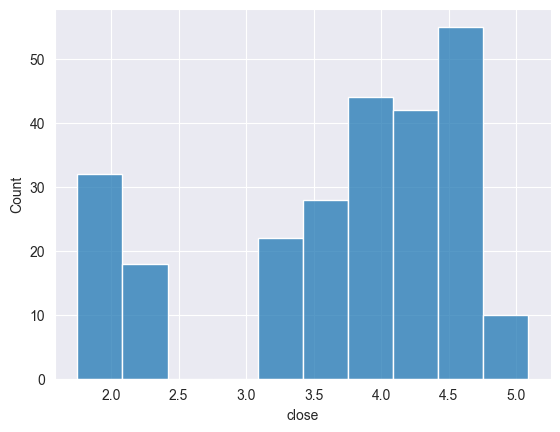

In [27]:
sns.histplot(data=df_gern, x="close")

Very low deviation to left, that stock stay between 3.2 and 4.4 dolars

<Axes: xlabel='timestamp', ylabel='close'>

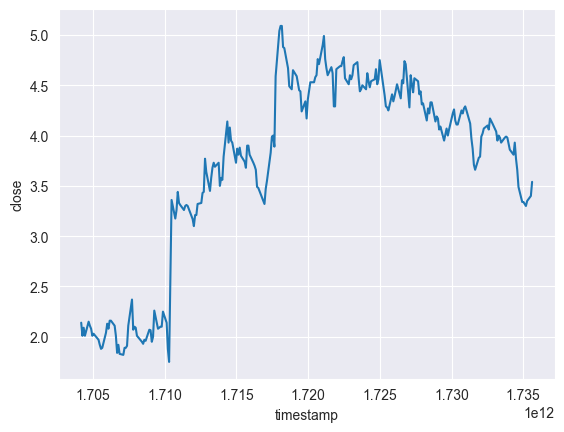

In [33]:
sns.lineplot(data=df_gern, x="timestamp", y="close")

## ENOV Stock Analysis

### ENOV Stock Description
ENOV (Enovis Corporation) is a medical technology company listed on the NYSE that operates in two segments: Prevention & Recovery (P&R) and Reconstructive (Recon), providing devices for injury prevention, joint replacement, and rehabilitation, with key products for musculoskeletal conditions, hip, knee, shoulder, and foot/ankle reconstruction. The company was formerly Colfax Corporation and is headquartered in Wilmington, Delaware.

In [35]:
df_enov = all_stocks['ENOV']
df_enov

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,55.61,56.075,55.260,55.44,589342.0,55.5687,1704171600000,10662,None
1,54.80,55.970,54.330,55.53,902428.0,55.4755,1704258000000,12018,None
2,55.43,55.810,54.690,55.48,617806.0,55.4110,1704344400000,10462,None
3,55.04,56.495,55.040,56.21,699408.0,56.0870,1704430800000,10267,None
4,56.88,57.720,56.440,57.33,481633.0,57.2268,1704690000000,10001,None
...,...,...,...,...,...,...,...,...,...
247,43.29,43.970,42.960,43.95,245834.0,43.5845,1735016400000,4495,None
248,43.62,44.610,43.520,44.52,397684.0,44.3295,1735189200000,7569,None
249,44.01,44.830,43.585,44.29,471721.0,44.0585,1735275600000,9326,None
250,44.04,44.170,42.675,43.43,610444.0,43.4000,1735534800000,9690,None


### Describe Statistics of ENOV Stock Close Value on 2024

In [36]:
print(f"Stock Close Value Mean on 2024: {df_enov['close'].mean():.2f}")

Stock Close Value Mean on 2024: 49.93


In [37]:
print(f"Stock Close Value STD on 2024: {df_enov['close'].std():.2f}")

Stock Close Value STD on 2024: 7.23


In [38]:
print(f"Stock Close Value Max on 2024: {df_enov['close'].max():.2f}")

Stock Close Value Max on 2024: 63.80


In [39]:
print(f"Stock Close Value Min on 2024: {df_enov['close'].min():.2f}")

Stock Close Value Min on 2024: 38.72


In [40]:
print(f"Stock Close Value Median on 2024: {df_enov['close'].median():.2f}")

Stock Close Value Median on 2024: 47.14


In [41]:
min_timestamp_idx = df_enov['timestamp'].idxmin()
max_timestamp_idx = df_enov['timestamp'].idxmax()

In [42]:
start_close_value = df_enov.iloc[min_timestamp_idx]['close']
print(f'Close value on start of 2024: {start_close_value:.2f}')

Close value on start of 2024: 55.44


In [43]:
end_close_value = df_enov.iloc[max_timestamp_idx]['close']
print(f'Close value on end of 2024: {end_close_value:.2f}')

Close value on end of 2024: 43.88


#### ENOV Stock Plots


<Axes: xlabel='close'>

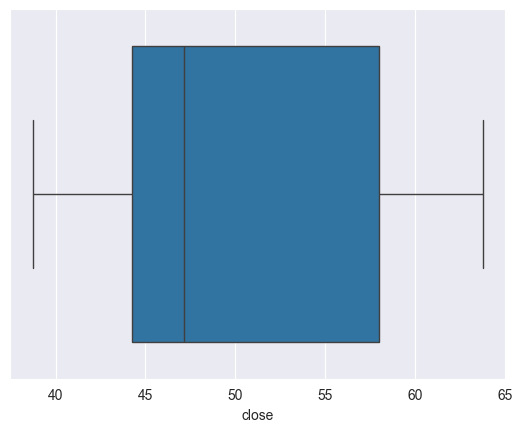

In [44]:
sns.boxplot(data=df_enov, x="close")

<Axes: xlabel='close', ylabel='Count'>

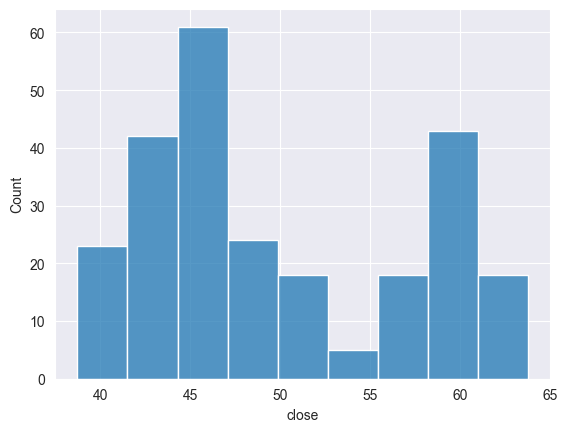

In [45]:
sns.histplot(data=df_enov, x="close")

High Deviation to Right, that show that has most lowest close values then high values

<Axes: xlabel='timestamp', ylabel='close'>

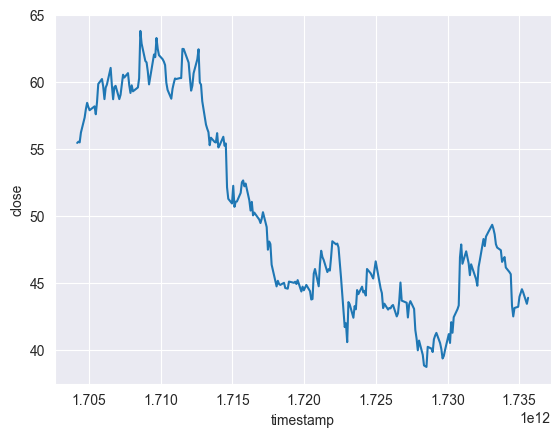

In [46]:
sns.lineplot(data=df_enov, x="timestamp", y="close")

That line plot shows that ENOV stock price decreased

## Training Models to Predict Stocks Values

### Getting More data to train a model - used in first experiment

In [69]:
stocks = get_stock_data_robust(client, ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'NVDA', 'META', 'TSLA'], '2020-01-01', '2025-09-08')
stocks

Coletando dados para o ticker: AAPL...
✅ Dados para AAPL coletados com sucesso.
Coletando dados para o ticker: GOOGL...
✅ Dados para GOOGL coletados com sucesso.
Coletando dados para o ticker: AMZN...
✅ Dados para AMZN coletados com sucesso.
Coletando dados para o ticker: MSFT...
✅ Dados para MSFT coletados com sucesso.
Coletando dados para o ticker: NVDA...
✅ Dados para NVDA coletados com sucesso.
Coletando dados para o ticker: META...
✅ Dados para META coletados com sucesso.
Coletando dados para o ticker: TSLA...
✅ Dados para TSLA coletados com sucesso.


{'AAPL': [Agg(open=180.07, high=180.3, low=177.34, close=179.36, volume=58953052.0, vwap=178.8465, timestamp=1694404800000, transactions=722430, otc=None),
  Agg(open=179.49, high=180.13, low=174.82, close=176.3, volume=90370192.0, vwap=176.7051, timestamp=1694491200000, transactions=937420, otc=None),
  Agg(open=176.51, high=177.3, low=173.98, close=174.21, volume=84267928.0, vwap=175.0352, timestamp=1694577600000, transactions=835150, otc=None),
  Agg(open=174, high=176.1, low=173.58, close=175.74, volume=60895757.0, vwap=175.3706, timestamp=1694664000000, transactions=641018, otc=None),
  Agg(open=176.48, high=176.495, low=173.82, close=175.01, volume=109259461.0, vwap=175.0843, timestamp=1694750400000, transactions=729794, otc=None),
  Agg(open=176.48, high=179.38, low=176.17, close=177.97, volume=67257573.0, vwap=177.8915, timestamp=1695009600000, transactions=731278, otc=None),
  Agg(open=177.52, high=179.63, low=177.13, close=179.07, volume=51826941.0, vwap=178.4293, timestamp=1

In [75]:
stocks_dict = {key: [agg.__dict__ for agg in stocks[key]] for key in stocks.keys()}
stocks_dict['AAPL']

[{'open': 180.07,
  'high': 180.3,
  'low': 177.34,
  'close': 179.36,
  'volume': 58953052.0,
  'vwap': 178.8465,
  'timestamp': 1694404800000,
  'transactions': 722430,
  'otc': None},
 {'open': 179.49,
  'high': 180.13,
  'low': 174.82,
  'close': 176.3,
  'volume': 90370192.0,
  'vwap': 176.7051,
  'timestamp': 1694491200000,
  'transactions': 937420,
  'otc': None},
 {'open': 176.51,
  'high': 177.3,
  'low': 173.98,
  'close': 174.21,
  'volume': 84267928.0,
  'vwap': 175.0352,
  'timestamp': 1694577600000,
  'transactions': 835150,
  'otc': None},
 {'open': 174,
  'high': 176.1,
  'low': 173.58,
  'close': 175.74,
  'volume': 60895757.0,
  'vwap': 175.3706,
  'timestamp': 1694664000000,
  'transactions': 641018,
  'otc': None},
 {'open': 176.48,
  'high': 176.495,
  'low': 173.82,
  'close': 175.01,
  'volume': 109259461.0,
  'vwap': 175.0843,
  'timestamp': 1694750400000,
  'transactions': 729794,
  'otc': None},
 {'open': 176.48,
  'high': 179.38,
  'low': 176.17,
  'close': 1

In [182]:
df = pd.DataFrame()
for stock in stocks_dict.keys():
    print(f'Transforming {stock} to dataframe...')
    df_stock = pd.DataFrame(stocks_dict[stock])
    df_stock['stock'] = stock
    df = pd.concat([df, df_stock])
df

Transforming AAPL to dataframe...
Transforming GOOGL to dataframe...
Transforming AMZN to dataframe...
Transforming MSFT to dataframe...
Transforming NVDA to dataframe...
Transforming META to dataframe...
Transforming TSLA to dataframe...


,open,high,low,close,volume,vwap,timestamp,transactions,otc,stock
0,180.07,180.300,177.3400,179.36,58953052.0,178.8465,1694404800000,722430,None,AAPL
1,179.49,180.130,174.8200,176.30,90370192.0,176.7051,1694491200000,937420,None,AAPL
2,176.51,177.300,173.9800,174.21,84267928.0,175.0352,1694577600000,835150,None,AAPL
3,174.00,176.100,173.5800,175.74,60895757.0,175.3706,1694664000000,641018,None,AAPL
4,176.48,176.495,173.8200,175.01,109259461.0,175.0843,1694750400000,729794,None,AAPL
...,...,...,...,...,...,...,...,...,...,...
495,328.23,333.330,325.6000,329.36,58391952.0,329.6721,1756785600000,918177,None,TSLA
496,335.20,343.330,328.5100,334.09,88733288.0,337.1171,1756872000000,1299631,None,TSLA
497,336.15,338.890,331.4800,338.53,60711033.0,335.2549,1756958400000,778497,None,TSLA
498,348.00,355.870,344.6801,350.84,108989785.0,349.7415,1757044800000,1435682,None,TSLA


#### Saving DataFrame

In [116]:
df.to_parquet('data/stocks_data_2023_09_11_to_2025_09_08')

#### Plotting Data

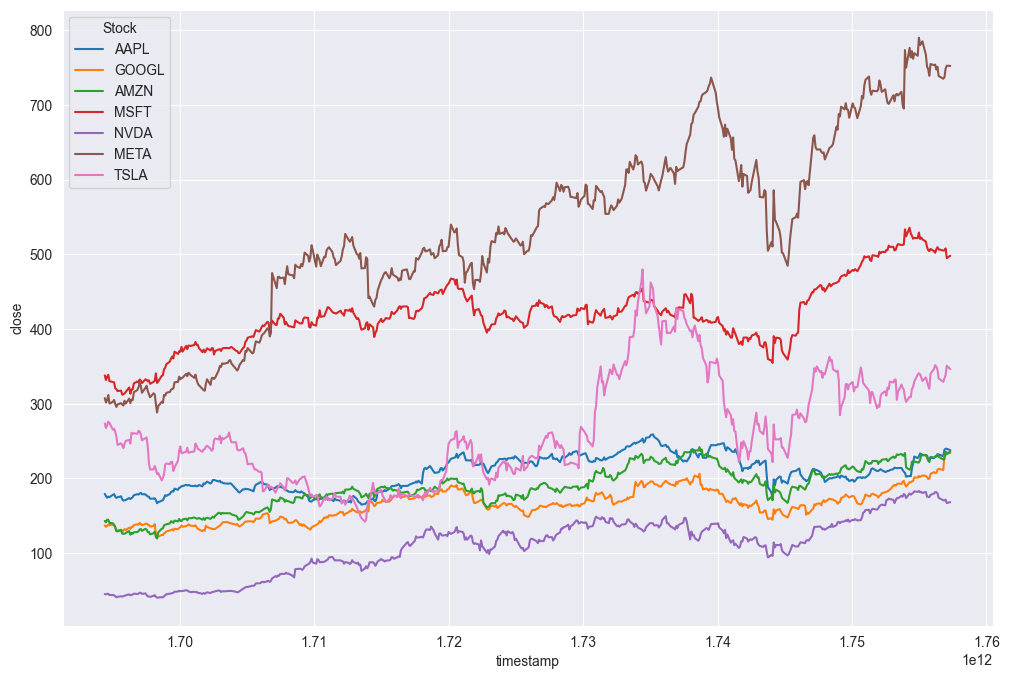

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for stock in stocks_dict.keys():
    sns.lineplot(data=df[df['stock'] == stock], x="timestamp", y="close", label=stock)

plt.legend(title='Stock')
plt.show()

### Getting Stock Data

In [14]:
import os

files_list = os.listdir('data')

In [15]:
import pandas as pd

df = pd.DataFrame()
for file in files_list:
    path = os.path.join('data', file)
    print(f'Reading {path}...')
    df_stock = pd.read_parquet(path)
    df_stock['stock'] = file.split('_')[0]
    df = pd.concat([df, df_stock])

Reading data\AACT_2023_09_01_to_2025_09_08.parquet...
Reading data\AAME_2023_09_01_to_2025_09_08.parquet...
Reading data\AAOI_2023_09_01_to_2025_09_08.parquet...
Reading data\AAPL_2023_09_01_to_2025_09_08.parquet...
Reading data\ABAT_2023_09_01_to_2025_09_08.parquet...
Reading data\ABP_2023_09_01_to_2025_09_08.parquet...
Reading data\ABTC_2023_09_01_to_2025_09_08.parquet...
Reading data\ABT_2023_09_01_to_2025_09_08.parquet...
Reading data\ACCO_2023_09_01_to_2025_09_08.parquet...
Reading data\ACIW_2023_09_01_to_2025_09_08.parquet...
Reading data\ACVF_2023_09_01_to_2025_09_08.parquet...
Reading data\ADAG_2023_09_01_to_2025_09_08.parquet...
Reading data\ADBE_2023_09_01_to_2025_09_08.parquet...
Reading data\ADBG_2023_09_01_to_2025_09_08.parquet...
Reading data\ADC_2023_09_01_to_2025_09_08.parquet...
Reading data\ADNWW_2023_09_01_to_2025_09_08.parquet...
Reading data\ADPT_2023_09_01_to_2025_09_08.parquet...
Reading data\ADVB_2023_09_01_to_2025_09_08.parquet...
Reading data\ADVM_2023_09_01_t

In [16]:
df

,open,high,low,close,volume,vwap,timestamp,transactions,otc,stock
0,10.240,10.2900,10.240,10.290,34504.0,10.2438,1694404800000,3,None,AACT
1,10.260,10.2600,10.230,10.230,56845.0,10.2320,1694491200000,58,None,AACT
2,10.235,10.2395,10.235,10.235,7971.0,10.2353,1694577600000,43,None,AACT
3,10.240,10.2500,10.235,10.240,47077.0,10.2396,1694664000000,34,None,AACT
4,10.240,10.2500,10.240,10.250,14040.0,10.2476,1694750400000,14,None,AACT
...,...,...,...,...,...,...,...,...,...,...
494,9.020,9.3500,8.920,9.100,1038041.0,9.1380,1756785600000,10888,None,ZVRA
495,9.040,9.3300,8.900,8.920,881969.0,9.0832,1756872000000,10429,None,ZVRA
496,9.010,9.0800,8.645,8.930,1633586.0,8.8451,1756958400000,17276,None,ZVRA
497,8.950,8.9900,8.720,8.950,765752.0,8.8939,1757044800000,12109,None,ZVRA


- 10/09/2025 - 114143 rows, 258 files
- 11/09/2025 - 401256 rows, 909 files

In [17]:
df['stock'].value_counts()

stock
ZTO     500
YANG    500
XYLG    500
AAOI    500
AAPL    500
       ... 
SRTA      6
BBBY      6
ABTC      4
TDAQ      3
HYFT      3
Name: count, Length: 909, dtype: int64

### Selecting Data

In [18]:
df_close = df[['close']]
df_close

,close
0,10.290
1,10.230
2,10.235
3,10.240
4,10.250
...,...
494,9.100
495,8.920
496,8.930
497,8.950


In [19]:
df['close'].mean(), df['close'].std()

(np.float64(91.01097749539447), np.float64(3528.0871147066446))

### Encoding Stock Symbols and Scaling Close Values

In [20]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

scaler = StandardScaler()
encoder = OrdinalEncoder()

df_close['close'] = scaler.fit_transform(df_close[['close']])
#df_close['stock'] = encoder.fit_transform(df_close[['stock']])

df_close

C:\Users\Victor Dantas\AppData\Local\Temp\ipykernel_31776\981375440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['close'] = scaler.fit_transform(df_close[['close']])


,close
0,-0.022880
1,-0.022897
2,-0.022895
3,-0.022894
4,-0.022891
...,...
494,-0.023217
495,-0.023268
496,-0.023265
497,-0.023259


In [21]:
scaler.mean_, scaler.scale_

(array([91.0109775]), array([3528.0827184]))

In [27]:
close_values = df_close['close'].values
close_values

array([-0.02287956, -0.02289657, -0.02289515, ..., -0.02326504,
       -0.02325937, -0.0234351 ], shape=(401256,))

In [28]:
close_values.shape

(401256,)

In [29]:
close_values = close_values[:401000]

In [30]:
close_values = close_values.reshape(40100, 10)
close_values

array([[-0.02287956, -0.02289657, -0.02289515, ..., -0.0228856 ,
        -0.02288665, -0.02288806],
       [-0.02288523, -0.02288806, -0.02288523, ..., -0.02288381,
        -0.02288239, -0.02288523],
       [-0.02288523, -0.02288239, -0.02288146, ..., -0.02288523,
        -0.02288239, -0.02287389],
       ...,
       [-0.02392829, -0.02399064, -0.02408135, ..., -0.02403316,
        -0.02414087, -0.02423724],
       [-0.02395663, -0.02401049, -0.02356265, ..., -0.02386593,
        -0.02387443, -0.02381491],
       [-0.02377523, -0.0237072 , -0.0237894 , ..., -0.02379224,
        -0.02375255, -0.02373838]], shape=(40100, 10))

### Splitting Data

In [31]:
X = close_values[:, :-1]
X

array([[-0.02287956, -0.02289657, -0.02289515, ..., -0.02288806,
        -0.0228856 , -0.02288665],
       [-0.02288523, -0.02288806, -0.02288523, ..., -0.02288523,
        -0.02288381, -0.02288239],
       [-0.02288523, -0.02288239, -0.02288146, ..., -0.02287956,
        -0.02288523, -0.02288239],
       ...,
       [-0.02392829, -0.02399064, -0.02408135, ..., -0.02403033,
        -0.02403316, -0.02414087],
       [-0.02395663, -0.02401049, -0.02356265, ..., -0.02392262,
        -0.02386593, -0.02387443],
       [-0.02377523, -0.0237072 , -0.0237894 , ..., -0.02376106,
        -0.02379224, -0.02375255]], shape=(40100, 9))

In [32]:
X.shape

(40100, 9)

In [33]:
y = close_values[:, -1]
y

array([-0.02288806, -0.02288523, -0.02287389, ..., -0.02423724,
       -0.02381491, -0.02373838], shape=(40100,))

In [34]:
y.shape

(40100,)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, X_test.shape

((36090, 9), (4010, 9))

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
X_train.shape, X_test.shape, X_val.shape

((32481, 9), (4010, 9), (3609, 9))

### Training MLP like Baseline Model

In [37]:
import tensorflow as tf
from tensorflow import keras

baseline_model = keras.models.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [38]:
baseline_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [39]:
baseline_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8467 - mean_absolute_error: 0.3350 - mean_squared_error: 0.8467 - val_loss: 1.4100 - val_mean_absolute_error: 0.1848 - val_mean_squared_error: 1.4100
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7411 - mean_absolute_error: 0.1182 - mean_squared_error: 0.7411 - val_loss: 1.3890 - val_mean_absolute_error: 0.0970 - val_mean_squared_error: 1.3890
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7324 - mean_absolute_error: 0.0707 - mean_squared_error: 0.7324 - val_loss: 1.3858 - val_mean_absolute_error: 0.0717 - val_mean_squared_error: 1.3858
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7306 - mean_absolute_error: 0.0535 - mean_squared_error: 0.7306 - val_loss: 1.3847 - val_mean_absolute_error: 0.0601 - val_mean_squared_error: 1.3847
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7298 - mean_absolute_error: 0.0447 - mean_squared_error: 0.7298 - val_loss: 1.3843 - val_m

In [40]:
loss, mse, mabs = baseline_model.evaluate(X_test, y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9105 - mean_absolute_error: 0.0534 - mean_squared_error: 3.9105


In [41]:
mse_baseline = (mse * scaler.scale_) + scaler.mean_
print(f'Baseline MSE: {mse_baseline[0]:.2f}')

Baseline MSE: 13887.44


### Training SimpleRNN

In [42]:
simple_rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]),
])

C:\Users\Victor Dantas\PycharmProjects\share_price_analysis\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
simple_rnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [44]:
history = simple_rnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7387 - mean_absolute_error: 0.0749 - mean_squared_error: 0.7387 - val_loss: 1.3867 - val_mean_absolute_error: 0.0593 - val_mean_squared_error: 1.3867
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7307 - mean_absolute_error: 0.0384 - mean_squared_error: 0.7307 - val_loss: 1.3844 - val_mean_absolute_error: 0.0426 - val_mean_squared_error: 1.3844
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7294 - mean_absolute_error: 0.0273 - mean_squared_error: 0.7294 - val_loss: 1.3837 - val_mean_absolute_error: 0.0354 - val_mean_squared_error: 1.3837
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7289 - mean_absolute_error: 0.0217 - mean_squared_error: 0.7289 - val_loss: 1.3835 - val_mean_absolute_error: 0.0313 - val_mean_squared_error: 1.3835
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7287 - mean_absolute_error: 0.0181 - mean_squared_error: 0.7287 - val_loss: 1.3834 - val_m

In [45]:
loss, mse, mabs = simple_rnn_model.evaluate(X_test, y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9097 - mean_absolute_error: 0.0351 - mean_squared_error: 3.9097


In [46]:
mse_simple_rnn = (mse * scaler.scale_) + scaler.mean_
print(f'Simple RNN MSE: {mse_simple_rnn[0]:.2f}')

Simple RNN MSE: 13884.93


- 10/09/2025 - 201.77
- 11/09/2025 - 13884.93

### Training a 'Deep' RNN

In [47]:
rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1),
])

C:\Users\Victor Dantas\PycharmProjects\share_price_analysis\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
rnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [49]:
rnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.7459 - mean_absolute_error: 0.0145 - mean_squared_error: 0.7459 - val_loss: 1.3987 - val_mean_absolute_error: 0.0229 - val_mean_squared_error: 1.3987
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.7310 - mean_absolute_error: 0.0141 - mean_squared_error: 0.7310 - val_loss: 1.3839 - val_mean_absolute_error: 0.0281 - val_mean_squared_error: 1.3839
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.7289 - mean_absolute_error: 0.0154 - mean_squared_error: 0.7289 - val_loss: 1.3834 - val_mean_absolute_error: 0.0237 - val_mean_squared_error: 1.3834
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.7287 - mean_absolute_error: 0.0136 - mean_squared_error: 0.7287 - val_loss: 1.3833 - val_mean_absolute_error: 0.0237 - val_mean_squared_error: 1.3833
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7287 - mean_absolute_error: 0.0133 - mean_squared_error: 0.7287 - val_loss: 1.3833 - val_

In [50]:
loss, mse, mabs = rnn_model.evaluate(X_test, y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9112 - mean_absolute_error: 0.0340 - mean_squared_error: 3.9112


In [51]:
rnn_model_mse = (mse * scaler.scale_) + scaler.mean_
print(f'Deep RNN MSE: {rnn_model_mse[0]:.2f}')

Deep RNN MSE: 13890.03


- 10/09/2025 - 200.99
- 11/09/2025 - 13890.03

### Adding a Dense Layer to output

In [52]:
rnn_model_2 = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1),
])

C:\Users\Victor Dantas\PycharmProjects\share_price_analysis\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
rnn_model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [54]:
rnn_model_2.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6786 - mean_absolute_error: 0.0168 - mean_squared_error: 0.6786 - val_loss: 1.2128 - val_mean_absolute_error: 0.0227 - val_mean_squared_error: 1.2128
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6473 - mean_absolute_error: 0.0166 - mean_squared_error: 0.6473 - val_loss: 1.1603 - val_mean_absolute_error: 0.0539 - val_mean_squared_error: 1.1603
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6312 - mean_absolute_error: 0.0155 - mean_squared_error: 0.6312 - val_loss: 1.1321 - val_mean_absolute_error: 0.0204 - val_mean_squared_error: 1.1321
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6203 - mean_absolute_error: 0.0133 - mean_squared_error: 0.6203 - val_loss: 1.1057 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 1.1057
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6097 - mean_absolute_error: 0.0139 - mean_squared_error: 0.6097 - val_loss: 1.0810 - val_m

In [55]:
loss, mse, mabs = rnn_model_2.evaluate(X_test, y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2225 - mean_absolute_error: 0.0310 - mean_squared_error: 3.2225


In [56]:
rnn_model_2_mse = (mse * scaler.scale_) + scaler.mean_
print(f'Deep RNN 2 with Dense Layer MSE: {rnn_model_2_mse[0]:.2f}')

Deep RNN 2 with Dense Layer MSE: 11460.16


- 10/09/2025 - 109.28
- 11/09/2025 - 11460.16

### Training a LSTM

In [57]:
lstm_rnn = keras.models.Sequential([
    keras.layers.LSTM(20, input_shape=[None, 1], return_sequences=True),
    keras.layers.LSTM(20),
    keras.layers.Dense(1),
])

C:\Users\Victor Dantas\PycharmProjects\share_price_analysis\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
lstm_rnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [59]:
lstm_rnn.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.7300 - mean_absolute_error: 0.0143 - mean_squared_error: 0.7300 - val_loss: 1.3351 - val_mean_absolute_error: 0.0408 - val_mean_squared_error: 1.3351
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6889 - mean_absolute_error: 0.0140 - mean_squared_error: 0.6889 - val_loss: 1.2016 - val_mean_absolute_error: 0.0309 - val_mean_squared_error: 1.2016
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.6340 - mean_absolute_error: 0.0134 - mean_squared_error: 0.6340 - val_loss: 1.1188 - val_mean_absolute_error: 0.0199 - val_mean_squared_error: 1.1188
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.6144 - mean_absolute_error: 0.0097 - mean_squared_error: 0.6144 - val_loss: 1.0871 - val_mean_absolute_error: 0.0474 - val_mean_squared_error: 1.0871
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6023 - mean_absolute_error: 0.0110 - mean_squared_error: 0.6023 - val_loss: 1.0624 - v

In [60]:
loss, mse, mabs = lstm_rnn.evaluate(X_test, y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1974 - mean_absolute_error: 0.0338 - mean_squared_error: 3.1974


In [61]:
lstm_rnn_mse = (mse * scaler.scale_) + scaler.mean_
print(f'LSTM MSE: {lstm_rnn_mse[0]:.2f}')

LSTM MSE: 11371.66


- 10/09/2025 - 105.87
- 11/09/2025 - 11371.66

### Training a GRU

In [62]:
gru_rnn = keras.models.Sequential([
    keras.layers.GRU(20, input_shape=[None, 1], return_sequences=True),
    keras.layers.GRU(20),
    keras.layers.Dense(1),
])

C:\Users\Victor Dantas\PycharmProjects\share_price_analysis\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
gru_rnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [64]:
gru_rnn.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.7411 - mean_absolute_error: 0.0160 - mean_squared_error: 0.7411 - val_loss: 1.3362 - val_mean_absolute_error: 0.0238 - val_mean_squared_error: 1.3362
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.6932 - mean_absolute_error: 0.0138 - mean_squared_error: 0.6932 - val_loss: 1.2219 - val_mean_absolute_error: 0.0203 - val_mean_squared_error: 1.2219
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6457 - mean_absolute_error: 0.0138 - mean_squared_error: 0.6457 - val_loss: 1.1392 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 1.1392
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.6225 - mean_absolute_error: 0.0147 - mean_squared_error: 0.6225 - val_loss: 1.1046 - val_mean_absolute_error: 0.0186 - val_mean_squared_error: 1.1046
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.6085 - mean_absolute_error: 0.0120 - mean_squared_error: 0.6085 - val_loss: 1.0744 - 

In [65]:
loss, mse, mabs = gru_rnn.evaluate(X_test, y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2049 - mean_absolute_error: 0.0312 - mean_squared_error: 3.2049


In [67]:
gru_rnn_mse = (mse * scaler.scale_) + scaler.mean_
print(f'GRU MSE: {gru_rnn_mse[0]:.2f}')

GRU MSE: 11398.03


- 10/09/2025 - 103.72
- 11/09/2025 - 11398.03

### Training a GRU More Deep

In [97]:
gru_rnn_2 = keras.models.Sequential([
    keras.layers.GRU(20, input_shape=[None, 1], return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20),
    keras.layers.Dense(1),
])

C:\Users\Victor Dantas\PycharmProjects\share_price_analysis\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
gru_rnn_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [73]:
history = gru_rnn_2.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.0256 - mean_squared_error: 0.1027 - val_loss: 0.1750 - val_mean_absolute_error: 0.0357 - val_mean_squared_error: 0.1750
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0943 - mean_absolute_error: 0.0272 - mean_squared_error: 0.0943 - val_loss: 0.1563 - val_mean_absolute_error: 0.0577 - val_mean_squared_error: 0.1563
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0271 - mean_squared_error: 0.0871 - val_loss: 0.1341 - val_mean_absolute_error: 0.0352 - val_mean_squared_error: 0.1341
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0801 - mean_absolute_error: 0.0275 - mean_squared_error: 0.0801 - val_loss: 0.1188 - val_mean_absolute_error: 0.0356 - val_mean_squared_error: 0.1188
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0228 - mean_squared_error: 0.0736 - val_loss: 0.1089 - val_m

In [74]:
loss, mse, mabs = gru_rnn_2.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - mean_absolute_error: 0.0120 - mean_squared_error: 0.0086


In [75]:
gru_rnn_2_mse = (mse * scaler.scale_) + scaler.mean_
print(f'Deep RNN 2 with Dense Layer MSE: {gru_rnn_2_mse[0]:.2f}')

Deep RNN 2 with Dense Layer MSE: 52.41


<Axes: >

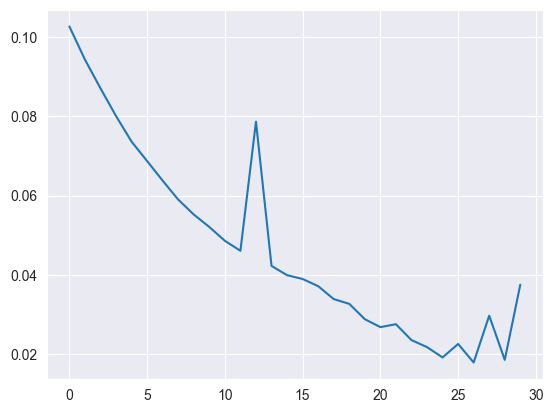

In [79]:
import seaborn as sns

learning_curve = history.history['loss']

sns.lineplot(learning_curve)

#### Training with 50 epochs

In [98]:
gru_rnn_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [87]:
history = gru_rnn_2.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6129 - mean_absolute_error: 0.0697 - mean_squared_error: 0.6129 - val_loss: 1.6956 - val_mean_absolute_error: 0.1066 - val_mean_squared_error: 1.6956
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4716 - mean_absolute_error: 0.0406 - mean_squared_error: 0.4716 - val_loss: 1.3524 - val_mean_absolute_error: 0.0950 - val_mean_squared_error: 1.3524
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4172 - mean_absolute_error: 0.0445 - mean_squared_error: 0.4172 - val_loss: 1.1996 - val_mean_absolute_error: 0.0838 - val_mean_squared_error: 1.1996
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3824 - mean_absolute_error: 0.0547 - mean_squared_error: 0.3824 - val_loss: 1.0923 - val_mean_absolute_error: 0.0889 - val_mean_squared_error: 1.0923
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3514 - mean_absolute_error: 0.0435 - mean_squared_error: 0.3514 - val_loss: 0.9790 - val_m

<Axes: >

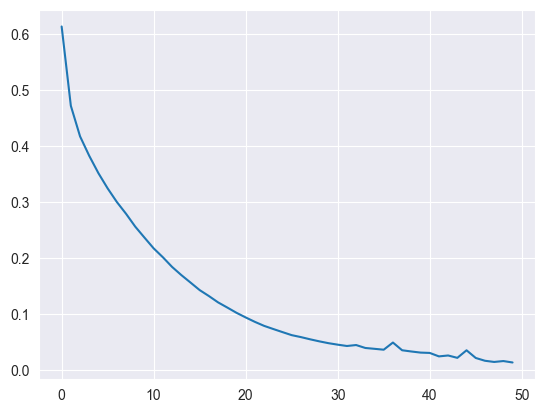

In [89]:
learning_curve = history.history['loss']

sns.lineplot(learning_curve)

In [90]:
loss, mse, mabs = gru_rnn_2.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - mean_absolute_error: 0.0154 - mean_squared_error: 0.0067


In [91]:
gru_rnn_2_mse = (mse * scaler.scale_) + scaler.mean_
print(f'Deep RNN 2 with Dense Layer MSE: {gru_rnn_2_mse[0]:.2f}')

Deep RNN 2 with Dense Layer MSE: 52.02


#### Training with 100 epochs

In [92]:
gru_rnn_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [99]:
history = gru_rnn_2.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6160 - mean_absolute_error: 0.0606 - mean_squared_error: 0.6160 - val_loss: 1.5835 - val_mean_absolute_error: 0.0978 - val_mean_squared_error: 1.5835
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4540 - mean_absolute_error: 0.0437 - mean_squared_error: 0.4540 - val_loss: 1.3213 - val_mean_absolute_error: 0.1655 - val_mean_squared_error: 1.3213
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4060 - mean_absolute_error: 0.0495 - mean_squared_error: 0.4060 - val_loss: 1.1655 - val_mean_absolute_error: 0.0910 - val_mean_squared_error: 1.1655
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3748 - mean_absolute_error: 0.0504 - mean_squared_error: 0.3748 - val_loss: 1.0574 - val_mean_absolute_error: 0.1075 - val_mean_squared_error: 1.0574
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3461 - mean_absolute_error: 0.0454 - mean_squared_error: 0.3461 - val_loss: 0.9616 - 

<Axes: >

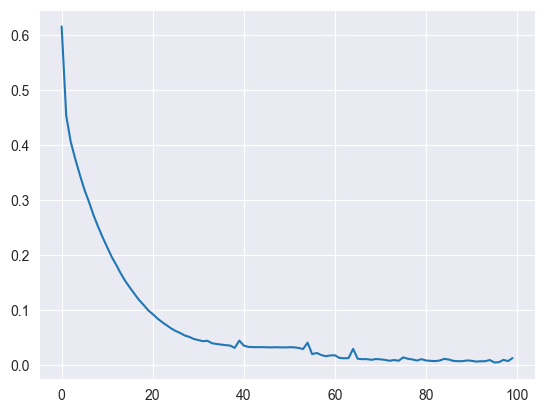

In [100]:
learning_curve = history.history['loss']

sns.lineplot(learning_curve)

In [101]:
loss, mse, mabs = gru_rnn_2.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mean_absolute_error: 0.0353 - mean_squared_error: 0.0039


In [102]:
gru_rnn_2_mse = (mse * scaler.scale_) + scaler.mean_
print(f'Deep RNN 2 with Dense Layer MSE: {gru_rnn_2_mse[0]:.2f}')

Deep RNN 2 with Dense Layer MSE: 51.44


### Training a LinearRegressor

In [327]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [328]:
linear_model.score(X_val, y_val)

0.9984128513179984

In [329]:
mse = linear_model.score(X_test, y_test)

In [330]:
linear_test_mse = (mse * scaler.scale_) + scaler.mean_
print(f'Baseline MSE: {linear_test_mse[0]:.2f}')

Baseline MSE: 422.20


### Brapi API

In [246]:
import requests

brapi_api_key = os.getenv("BRAPI_API_KEY")

# Para ações de teste (sem token)
url = "https://brapi.dev/api/quote/PETR4,MGLU3"
response = requests.get(url, params={"range": "1mo", "interval": "1d"})
response.json()

{'results': [{'currency': 'BRL',
   'marketCap': 418396174435,
   'shortName': 'PETROBRAS   PN      N2',
   'longName': 'Petróleo Brasileiro S.A. - Petrobras',
   'regularMarketChange': 0.24,
   'regularMarketChangePercent': 0.782,
   'regularMarketTime': '2025-09-09T20:07:34.000Z',
   'regularMarketPrice': 30.95,
   'regularMarketDayHigh': 31.15,
   'regularMarketDayRange': '30.81 - 31.15',
   'regularMarketDayLow': 30.81,
   'regularMarketVolume': 31240500,
   'regularMarketPreviousClose': 30.71,
   'regularMarketOpen': 31.1,
   'fiftyTwoWeekRange': '28.86 - 40.76',
   'fiftyTwoWeekLow': 28.86,
   'fiftyTwoWeekHigh': 40.76,
   'symbol': 'PETR4',
   'logourl': 'https://icons.brapi.dev/icons/PETR4.svg',
   'usedInterval': '1d',
   'usedRange': '1mo',
   'historicalDataPrice': [{'date': 1754917200,
     'open': 30.71,
     'high': 31.03,
     'low': 30.58,
     'close': 30.72,
     'volume': 28045800,
     'adjustedClose': 30.0385},
    {'date': 1755003600,
     'open': 30.79,
     'hig

-### Get All Stocks

In [21]:
url = "https://brapi.dev/api/quote/list"
response = requests.get(
    url,
    headers={"Authorization": f"Bearer {brapi_api_key}"},
    params={"range": "1mo", "interval": "1d"}
)

if response.status_code == 200:
    data = response.json()
    response.raise_for_status()
    print(data)
else:
    print(f"Erro: {response.status_code}")

{'indexes': [{'stock': '^AORD', 'name': 'ALL ORDINARIES'}, {'stock': '^BFX', 'name': 'BEL 20'}, {'stock': '^FCHI', 'name': 'CAC 40'}, {'stock': '^BUK100P', 'name': 'Cboe UK 100'}, {'stock': '^VIX', 'name': 'CBOE Volatility Index'}, {'stock': '^GDAXI', 'name': 'DAX PERFORMANCE-INDEX'}, {'stock': '^DJI', 'name': 'Dow Jones Industrial Average'}, {'stock': '^CASE30', 'name': 'EGX 30 Price Return Index'}, {'stock': '^STOXX50E', 'name': 'ESTX 50 PR.EUR'}, {'stock': '^N100', 'name': 'Euronext 100 Index'}, {'stock': '^FTSE', 'name': 'FTSE 100'}, {'stock': '^KLSE', 'name': 'FTSE Bursa Malaysia KLCI'}, {'stock': '^HSI', 'name': 'HANG SENG INDEX'}, {'stock': '^BVSP', 'name': 'IBOVESPA'}, {'stock': '^JKSE', 'name': 'IDX COMPOSITE'}, {'stock': 'IFIX.SA', 'name': 'IND FDO IMOB'}, {'stock': '^MXX', 'name': 'IPC MEXICO'}, {'stock': '^KS11', 'name': 'KOSPI Composite Index'}, {'stock': '^MERV', 'name': 'MERVAL'}, {'stock': '^IXIC', 'name': 'NASDAQ Composite'}, {'stock': '^N225', 'name': 'Nikkei 225'}, {